In [35]:
#Importing needed modules.
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers , Model
from tensorflow.keras.optimizers import RMSprop
#Instancing from ImageDataGenerator object
gen = ImageDataGenerator(rescale=1/255,
                         rotation_range=40,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         horizontal_flip=True,
                         zoom_range=0.2)
gen_valid = ImageDataGenerator(rescale=1/255)

In [54]:
#Generating datas.
ready_train = gen.flow_from_directory("D:\\datasets\\Beans_leaf_diseases\\train",
                                      target_size=(150,150),
                                      batch_size=10)
ready_valid = gen_valid.flow_from_directory("D:\\datasets\\Beans_leaf_diseases\\val",
                                      target_size=(150,150),
                                      batch_size=5)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


In [55]:
#Creating a model using InceptionV3.
pre_trained_model = InceptionV3(include_top=False,input_shape=(150,150,3))
for layer in pre_trained_model.layers :
    layer.trainable = False
last_l = pre_trained_model.get_layer('mixed7')
out = last_l.output
x = layers.Flatten()(out)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(3,activation='softmax')(x)
model = Model(pre_trained_model.input,x)
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [56]:
#Data train.
history = model.fit(ready_train,epochs=15,validation_data=ready_valid)

Epoch 1/15
104/104 [==============================] - 98s 899ms/step - loss: 0.7830 - accuracy: 0.6576 - val_loss: 0.5431 - val_accuracy: 0.7820
Epoch 2/15
104/104 [==============================] - 77s 740ms/step - loss: 0.5592 - accuracy: 0.7708 - val_loss: 0.6038 - val_accuracy: 0.7820
Epoch 3/15
104/104 [==============================] - 77s 740ms/step - loss: 0.5114 - accuracy: 0.8008 - val_loss: 0.3255 - val_accuracy: 0.8872
Epoch 4/15
104/104 [==============================] - 72s 694ms/step - loss: 0.4433 - accuracy: 0.8221 - val_loss: 0.3582 - val_accuracy: 0.8722
Epoch 5/15
104/104 [==============================] - 79s 761ms/step - loss: 0.4175 - accuracy: 0.8308 - val_loss: 0.3732 - val_accuracy: 0.8872
Epoch 6/15
104/104 [==============================] - 80s 768ms/step - loss: 0.3811 - accuracy: 0.8520 - val_loss: 0.4967 - val_accuracy: 0.8421
Epoch 7/15
104/104 [==============================] - 78s 747ms/step - loss: 0.4136 - accuracy: 0.8414 - val_loss: 0.3341 - val_ac

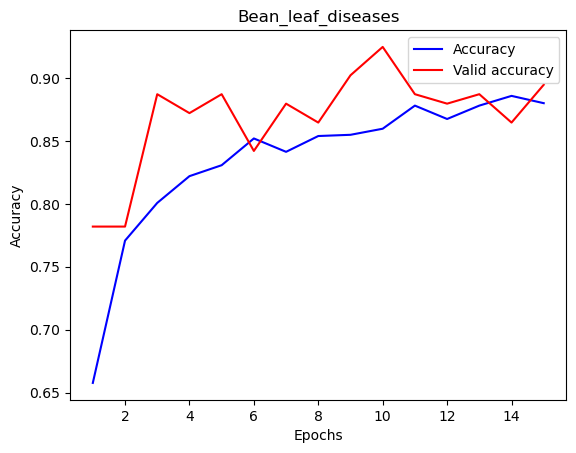

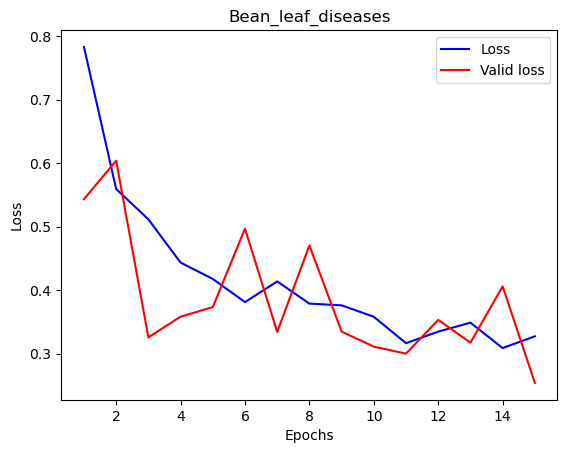

In [58]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Bean_leaf_diseases')
plt.legend(['Accuracy','Valid accuracy'])
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Bean_leaf_diseases')
plt.legend(['Loss','Valid loss'])
plt.show()